In [18]:
#  how to calculate th ecorrelation of two features



| |<font size="5">Classification  _  تصنيف البيانات </font>|
|-:|-:|
|<img src="https://www.tibco.com/blog/wp-content/uploads/2013/04/telco-churn.jpg" width=250></img>||
||<font size="4"> تحميل البيانات  </font>|
||<font size="4">  تحديد تسلسل معالجة البيانات</font>|
||<font size="4">XGBClassifier & PCA  تدريب البيانات وتقليص خصائصها </font>|
||<font size="4"> تقويم أداء الخوارزميات </font>|

In [1]:

#      تحميل البيانات
import numpy as np
import pandas as pd

df = pd.read_csv('../data/churn/churn_2.csv', index_col=0)

In [2]:
df.sample(3)

State  Account Length  Area Code Int'l Plan VMail Plan  VMail Message  \
1038    CA             112        415         no         no              0   
2466    MD              83        408         no        yes             38   
2430    MD             120        415         no        yes             40   

      Day Mins  Day Calls  Day Charge  Eve Mins  ...  Eve Charge  Night Mins  \
1038     111.9         92       19.02     114.0  ...        9.69       146.8   
2466     107.9         90       18.34     140.4  ...       11.93       253.6   
2430     128.1         99       21.78     247.7  ...       21.05       199.7   

      Night Calls  Night Charge  Intl Mins  Intl Calls  Intl Charge  \
1038           79          6.61       14.1           3         3.81   
2466           79         11.41       10.5           2         2.84   
2430          121          8.99       15.6           3         4.21   

      CustServ Calls  Churn? Churn  
1038               5   True.     1  
2466               0  False.     0  
2430               0  False.     0  

[3 rows x 21 columns]

In [3]:
df.shape

(3333, 21)

In [4]:
df.keys()

Index(['State', 'Account Length', 'Area Code', 'Int'l Plan', 'VMail Plan',
       'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins',
       'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge',
       'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?',
       'Churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Int'l Plan      3333 non-null   object 
 4   VMail Plan      3333 non-null   object 
 5   VMail Message   3333 non-null   int64  
 6   Day Mins        3333 non-null   float64
 7   Day Calls       3333 non-null   int64  
 8   Day Charge      3333 non-null   float64
 9   Eve Mins        3333 non-null   float64
 10  Eve Calls       3333 non-null   int64  
 11  Eve Charge      3333 non-null   float64
 12  Night Mins      3333 non-null   float64
 13  Night Calls     3333 non-null   int64  
 14  Night Charge    3333 non-null   float64
 15  Intl Mins       3333 non-null   float64
 16  Intl Calls      3333 non-null   int64  
 17  Intl Charge     3333 non-null   float6

In [6]:
#The CSV format does not store any information about data type
for col in df.select_dtypes("object").columns:
  #print(col)
  df[col]=df[col].astype("category")

In [7]:
df.dtypes

State             category
Account Length       int64
Area Code            int64
Int'l Plan        category
VMail Plan        category
VMail Message        int64
Day Mins           float64
Day Calls            int64
Day Charge         float64
Eve Mins           float64
Eve Calls            int64
Eve Charge         float64
Night Mins         float64
Night Calls          int64
Night Charge       float64
Intl Mins          float64
Intl Calls           int64
Intl Charge        float64
CustServ Calls       int64
Churn?            category
Churn                int64
dtype: object

In [8]:
df.isnull().sum()

State             0
Account Length    0
Area Code         0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
Churn             0
dtype: int64

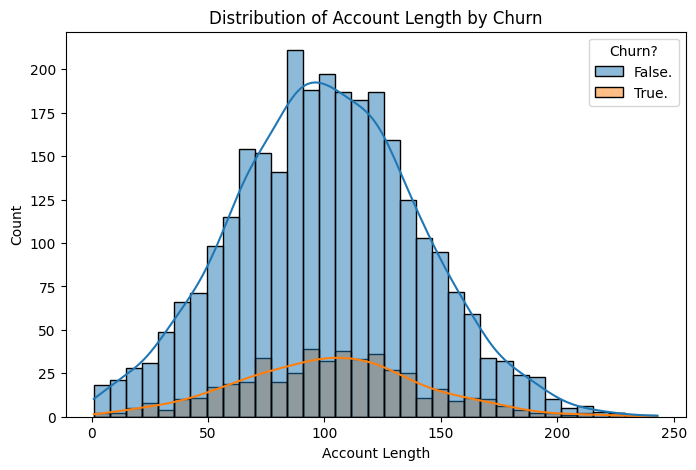

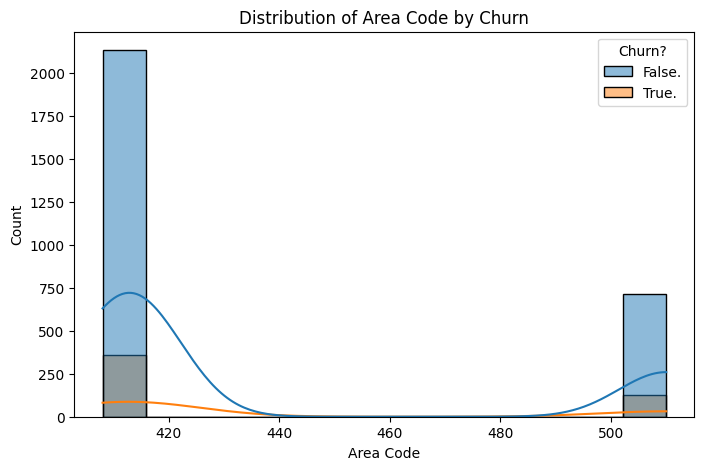

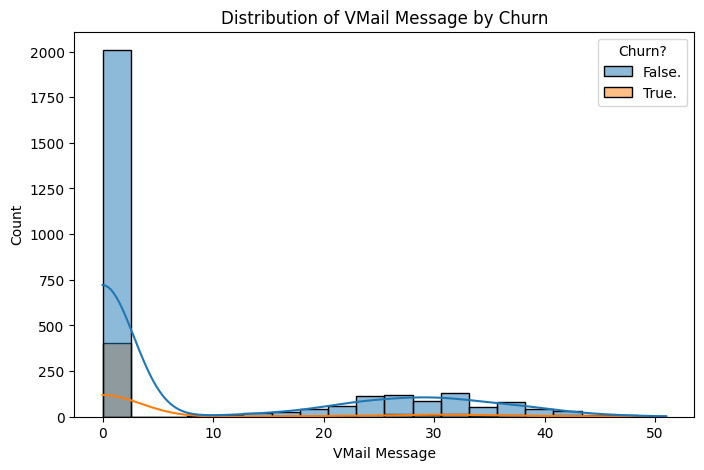

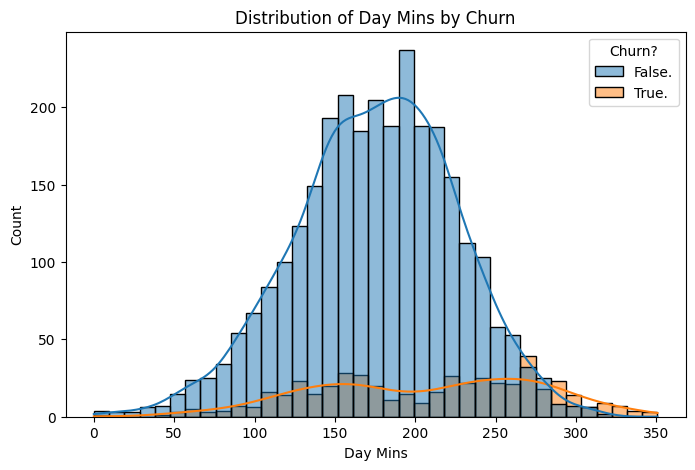

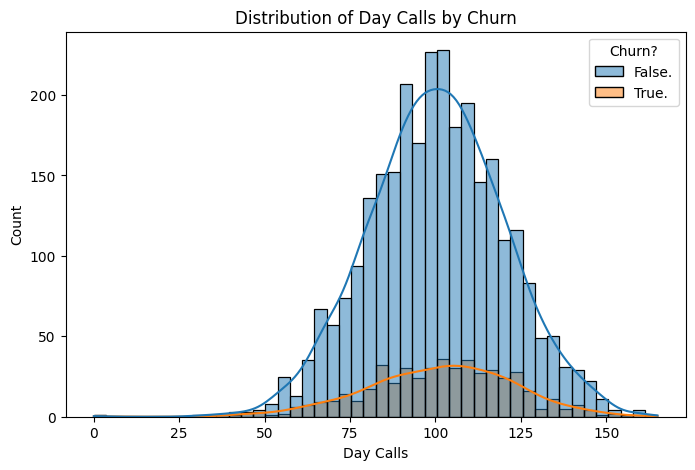

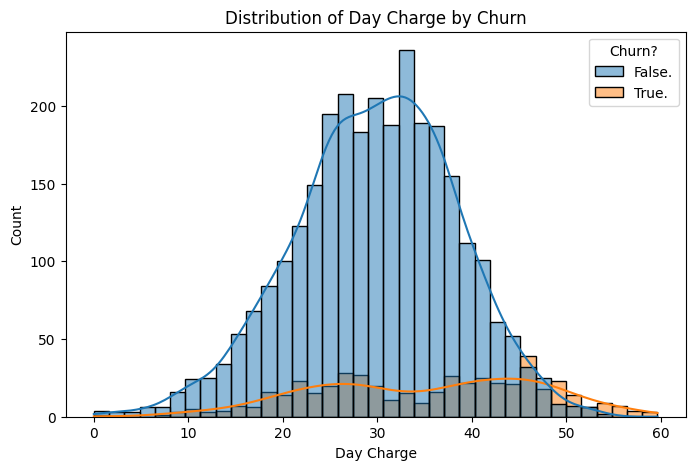

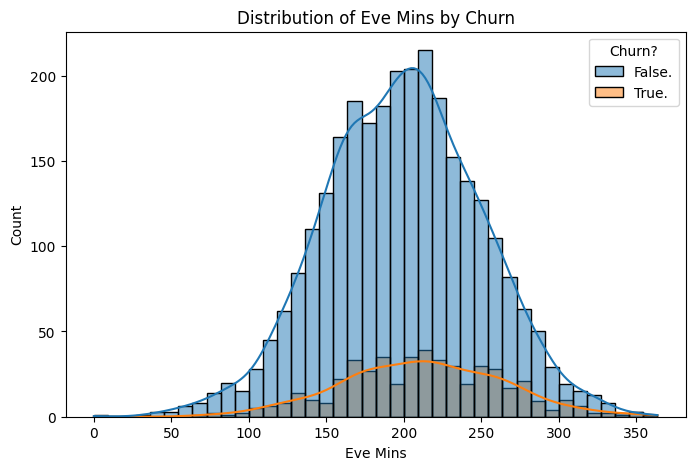

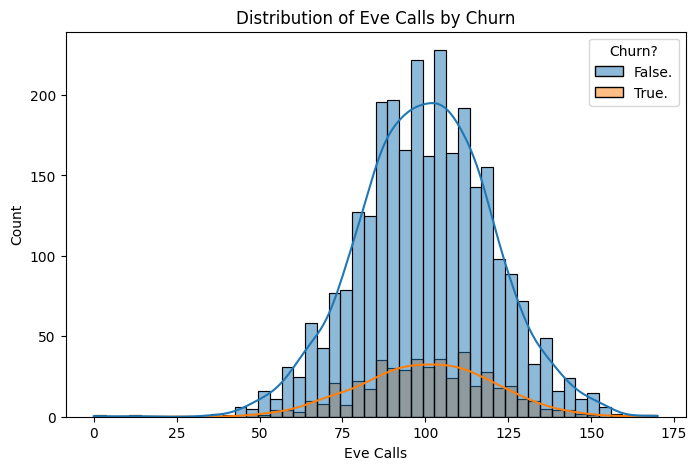

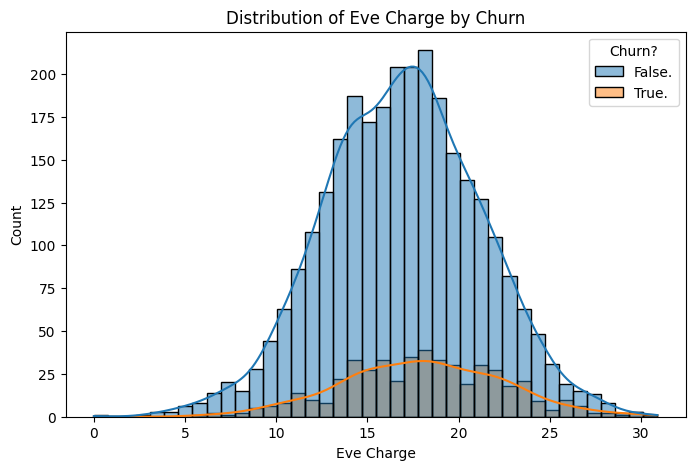

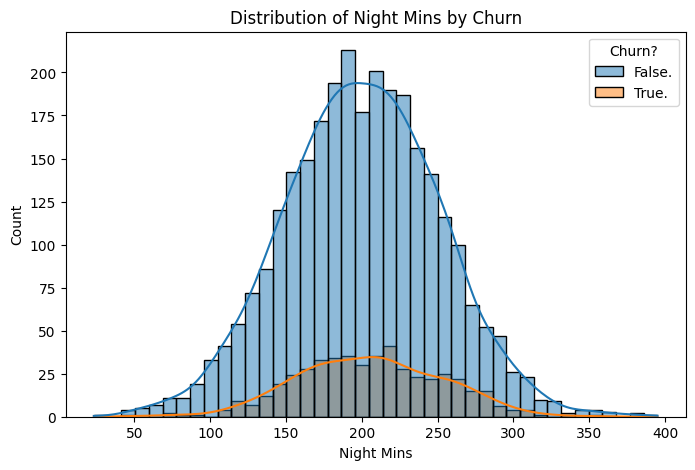

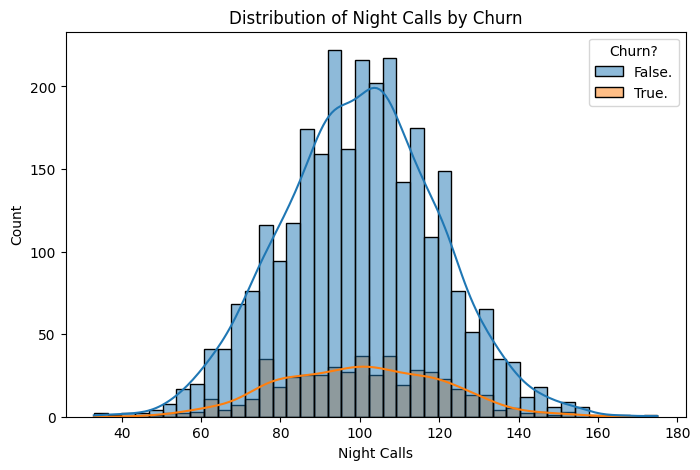

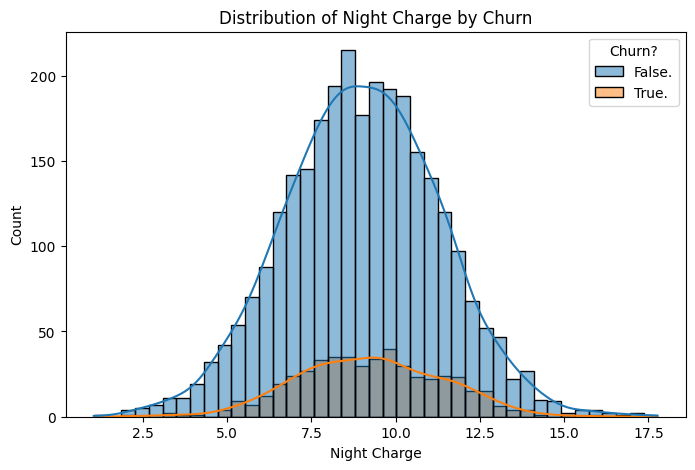

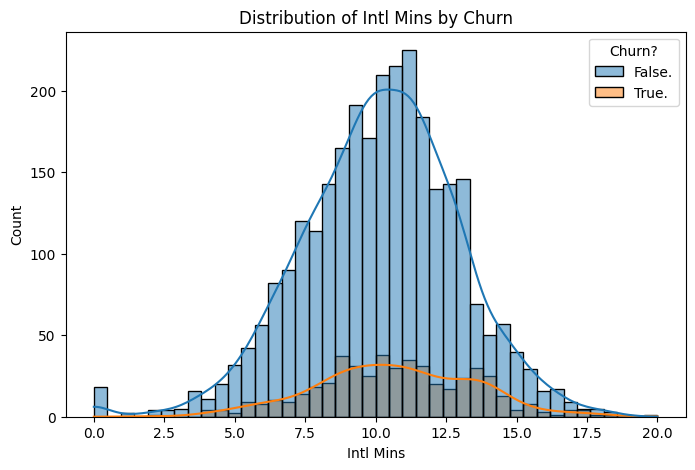

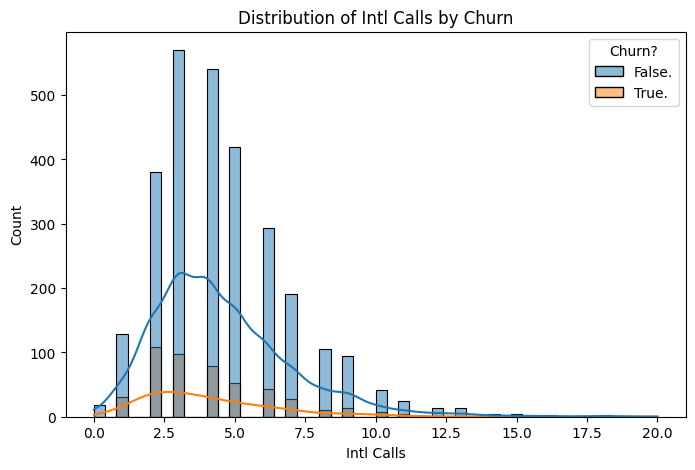

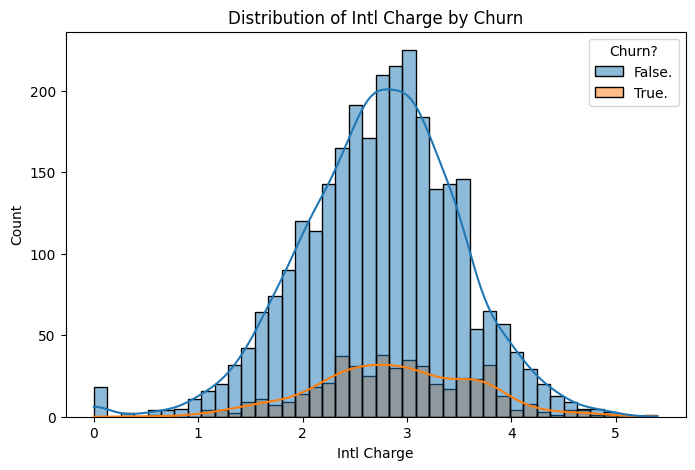

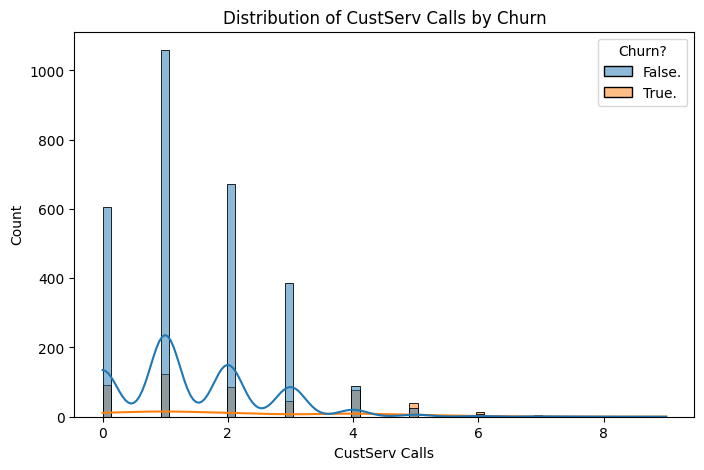

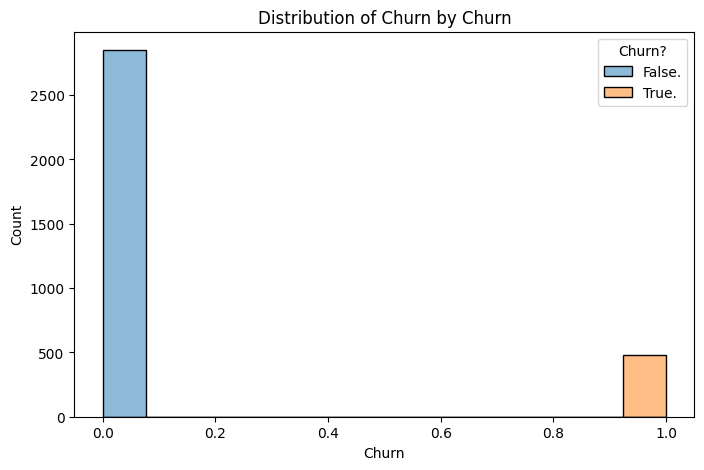

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_cols = df.select_dtypes("number").columns
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue='Churn?', kde=True)
    plt.title(f'Distribution of {col} by Churn')
    plt.show()

In [10]:
df["Churn"].value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

In [11]:
df.select_dtypes("number").corr().T.sort_values('Churn', ascending=False)

Account Length  Area Code  VMail Message  Day Mins  Day Calls  \
Churn                 0.016541   0.006174      -0.089728  0.205151   0.018459   
CustServ Calls       -0.003796   0.027572      -0.013263 -0.013423  -0.018942   
Day Mins              0.006216  -0.008264       0.000778  1.000000   0.006750   
Day Charge            0.006214  -0.008264       0.000776  1.000000   0.006753   
Eve Mins             -0.006757   0.003580       0.017562  0.007043  -0.021451   
Eve Charge           -0.006745   0.003607       0.017578  0.007029  -0.021449   
Intl Charge           0.009546  -0.018395       0.002884 -0.010092   0.021666   
Intl Mins             0.009514  -0.018288       0.002856 -0.010155   0.021565   
Night Charge         -0.008960  -0.005845       0.007663  0.004300   0.022927   
Night Mins           -0.008955  -0.005825       0.007681  0.004323   0.022938   
Day Calls             0.038470  -0.009646      -0.009548  0.006750   1.000000   
Account Length        1.000000  -0.012463      -0.004628  0.006216   0.038470   
Eve Calls             0.019260  -0.011886      -0.005864  0.015769   0.006462   
Area Code            -0.012463   1.000000      -0.001994 -0.008264  -0.009646   
Night Calls          -0.013176   0.016522       0.007123  0.022972  -0.019557   
Intl Calls            0.020661  -0.024179       0.013957  0.008033   0.004574   
VMail Message        -0.004628  -0.001994       1.000000  0.000778  -0.009548   

                Day Charge  Eve Mins  Eve Calls  Eve Charge  Night Mins  \
Churn             0.205151  0.092796   0.009233    0.092786    0.035493   
CustServ Calls   -0.013427 -0.012985   0.002423   -0.012987   -0.009288   
Day Mins          1.000000  0.007043   0.015769    0.007029    0.004323   
Day Charge        1.000000  0.007050   0.015769    0.007036    0.004324   
Eve Mins          0.007050  1.000000  -0.011430    1.000000   -0.012584   
Eve Charge        0.007036  1.000000  -0.011423    1.000000   -0.012592   
Intl Charge      -0.010094 -0.011067   0.008674   -0.011074   -0.015180   
Intl Mins        -0.010157 -0.011035   0.008703   -0.011043   -0.015207   
Night Charge      0.004301 -0.012593  -0.002056   -0.012601    0.999999   
Night Mins        0.004324 -0.012584  -0.002093   -0.012592    1.000000   
Day Calls         0.006753 -0.021451   0.006462   -0.021449    0.022938   
Account Length    0.006214 -0.006757   0.019260   -0.006745   -0.008955   
Eve Calls         0.015769 -0.011430   1.000000   -0.011423   -0.002093   
Area Code        -0.008264  0.003580  -0.011886    0.003607   -0.005825   
Night Calls       0.022972  0.007586   0.007710    0.007596    0.011204   
Intl Calls        0.008032  0.002541   0.017434    0.002541   -0.012353   
VMail Message     0.000776  0.017562  -0.005864    0.017578    0.007681   

                Night Calls  Night Charge  Intl Mins  Intl Calls  Intl Charge  \
Churn              0.006141      0.035496   0.068239   -0.052844     0.068259   
CustServ Calls    -0.012802     -0.009277  -0.009640   -0.017561    -0.009675   
Day Mins           0.022972      0.004300  -0.010155    0.008033    -0.010092   
Day Charge         0.022972      0.004301  -0.010157    0.008032    -0.010094   
Eve Mins           0.007586     -0.012593  -0.011035    0.002541    -0.011067   
Eve Charge         0.007596     -0.012601  -0.011043    0.002541    -0.011074   
Intl Charge       -0.013630     -0.015186   0.999993    0.032372     1.000000   
Intl Mins         -0.013605     -0.015214   1.000000    0.032304     0.999993   
Night Charge       0.011188      1.000000  -0.015214   -0.012329    -0.015186   
Night Mins         0.011204      0.999999  -0.015207   -0.012353    -0.015180   
Day Calls         -0.019557      0.022927   0.021565    0.004574     0.021666   
Account Length    -0.013176     -0.008960   0.009514    0.020661     0.009546   
Eve Calls          0.007710     -0.002056   0.008703    0.017434     0.008674   
Area Code          0.016522     -0.005845  -0.018288   -0.024179    -0.0

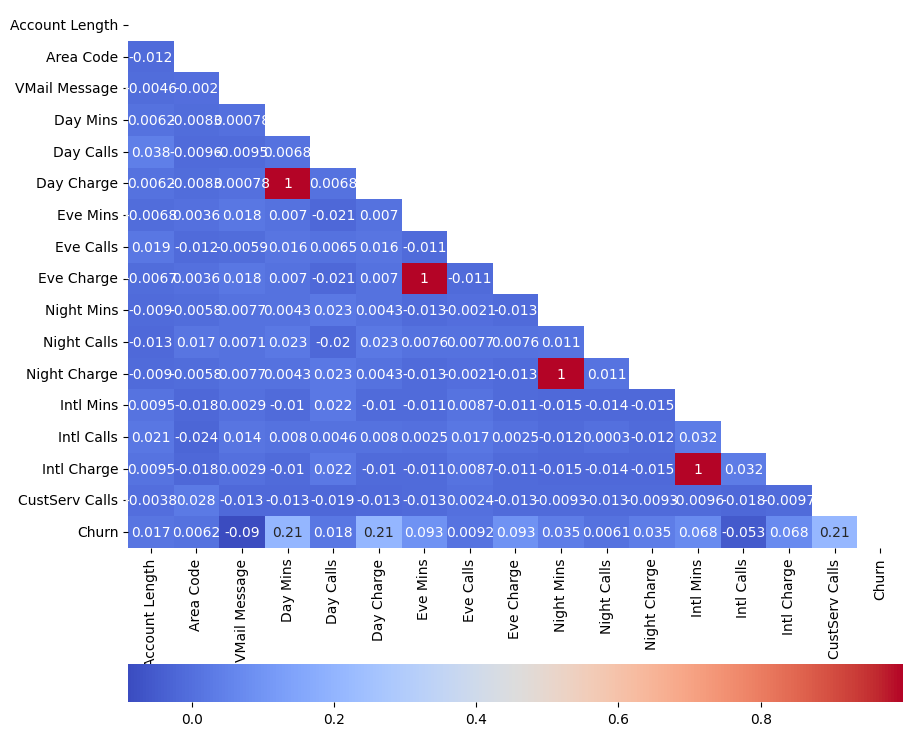

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
df_cor = df.select_dtypes("number") .corr()

matrix = np.triu(df_cor)
sns.heatmap(df_cor, mask=matrix, annot=True, cmap='coolwarm', cbar_kws={"orientation": "horizontal"}) 
plt.show()

In [13]:
df.drop(['Day Charge', 'Eve Charge', 'Night Charge', 'Intl Charge'], axis=1, inplace=True)

In [14]:
df.to_csv("../data/churn/churn_3.csv")

- In addition, we see that churners take on very similar distributions for features like Day Mins and Day Charge. That's not surprising as we'd expect minutes spent talking to correlate with charges. Let's dig deeper into the relationships between our features.

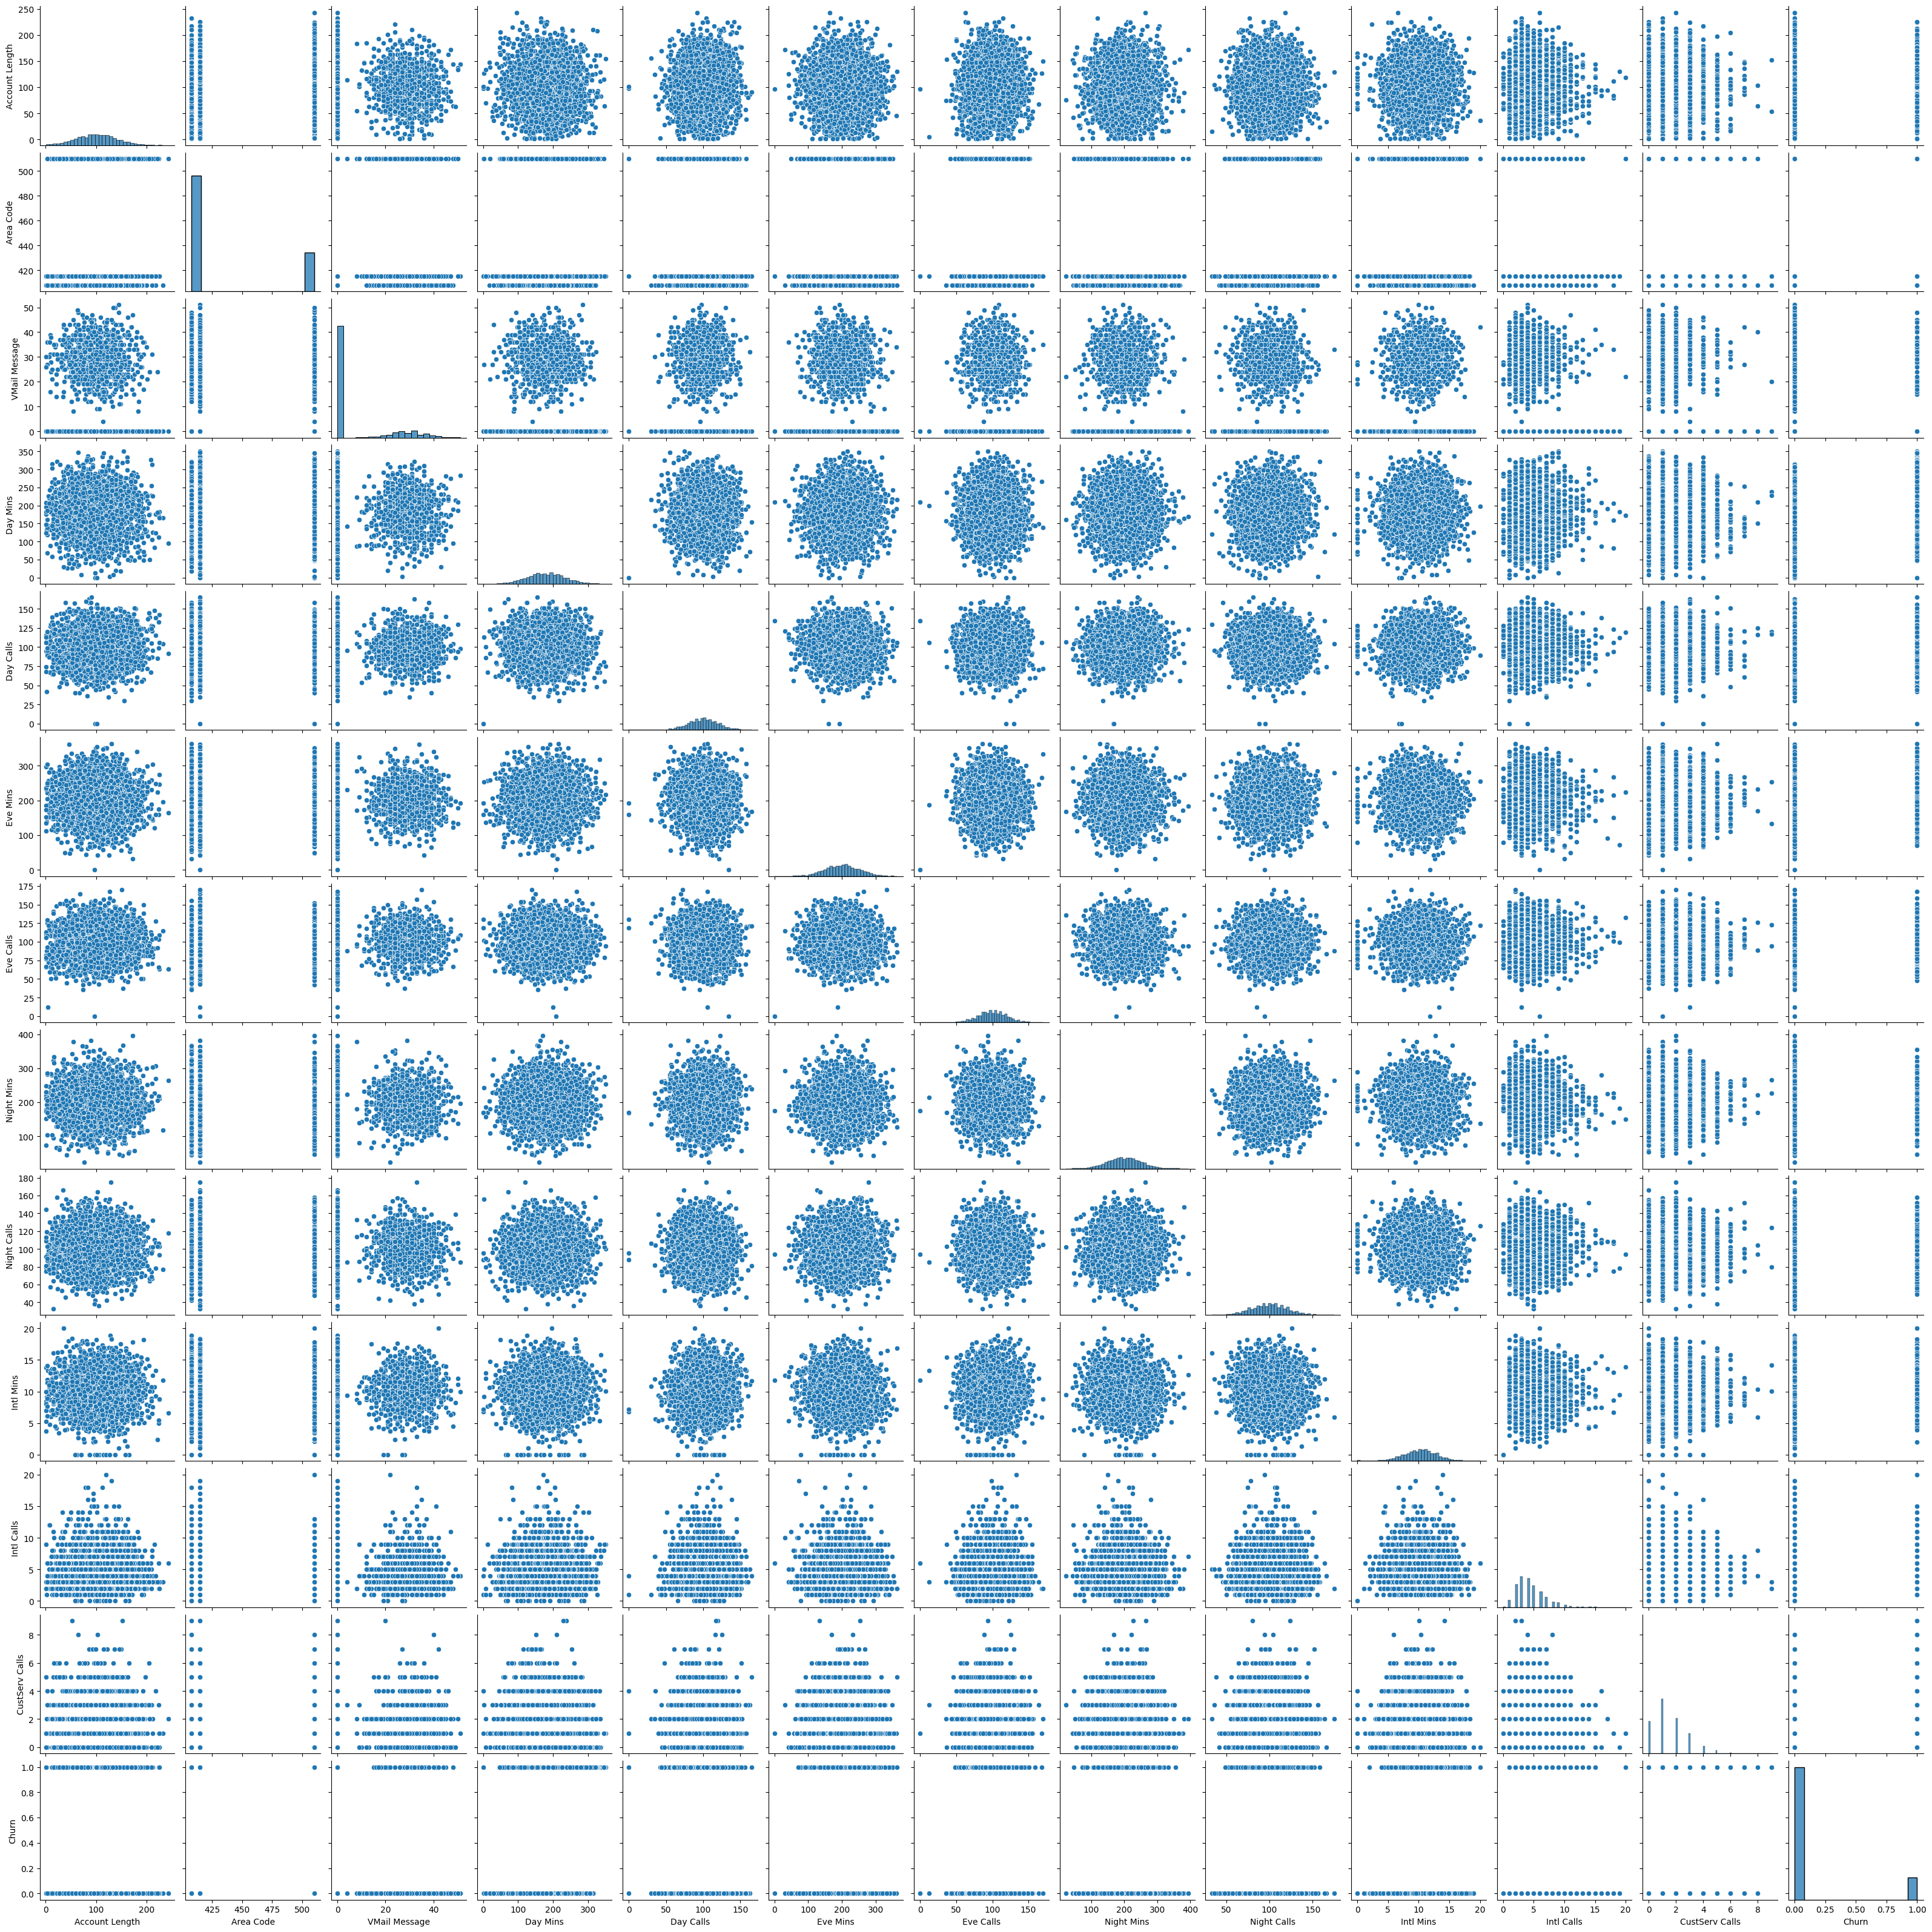

In [15]:
_=sns.pairplot(df)

In [16]:
df.dtypes

State             category
Account Length       int64
Area Code            int64
Int'l Plan        category
VMail Plan        category
VMail Message        int64
Day Mins           float64
Day Calls            int64
Eve Mins           float64
Eve Calls            int64
Night Mins         float64
Night Calls          int64
Intl Mins          float64
Intl Calls           int64
CustServ Calls       int64
Churn?            category
Churn                int64
dtype: object

In [17]:
df.select_dtypes("number").head()

Account Length  Area Code  VMail Message  Day Mins  Day Calls  Eve Mins  \
0             128        415             25     265.1        110     197.4   
1             107        415             26     161.6        123     195.5   
2             137        415              0     243.4        114     121.2   
3              84        408              0     299.4         71      61.9   
4              75        415              0     166.7        113     148.3   

   Eve Calls  Night Mins  Night Calls  Intl Mins  Intl Calls  CustServ Calls  \
0         99       244.7           91       10.0           3               1   
1        103       254.4          103       13.7           3               1   
2        110       162.6          104       12.2           5               0   
3         88       196.9           89        6.6           7               2   
4        122       186.9          121       10.1           3               3   

   Churn  
0      0  
1      0  
2      0  
3      0  
4      0

In [21]:
# تحديد الخصائص والهدف
X=df.drop("Churn", axis=1)
y=df["Churn"]

In [22]:
# تقسيم البيانات :  تدريب &  اختبار
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y  ,test_size=.33, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import make_column_transformer , make_column_selector  as selector
# from sklearn.compose import

from sklearn.pipeline import make_pipeline


num_pipeline= make_pipeline(
     StandardScaler()    # تغيير سلم البيانات الرقمية
)

cat_pipeline= make_pipeline(
     OneHotEncoder(drop="if_binary", sparse_output=False)  #   بما ان جميع القيم الناقصة قد تم تعويضا فلا فائدة من معالجتها لذا نقوم هنا باسقاط احد العمودين في حالة المتغير الثنائي

)

preprocess= make_column_transformer(
     ( num_pipeline,  selector(dtype_include="number") ),  #توظيف  سلسة معالجة الباينات أعلاه على جميع البيانات الرقمية
     (cat_pipeline, selector(dtype_exclude="number")) , #category  كان بالامكان تغيير  نوع المتغيرات الى تصنيف
     remainder="passthrough"  # واسقاط باقي البيانات الغير رقمية
     )

In [24]:
# حجم البيانات الجديد
preprocess.fit_transform(X_train).shape

(2233, 66)

In [25]:
# التحقق من تحويل  البيانات
preprocess.fit_transform(X_train)

array([[-0.81498972, -0.51621471, -0.588063  , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.76425984, -0.51621471,  1.16095039, ...,  0.        ,
         1.        ,  0.        ],
       [-0.33870811,  1.7389225 ,  2.25408377, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.86512463, -0.68238272, -0.588063  , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.71682307, -0.51621471, -0.588063  , ...,  0.        ,
         0.        ,  0.        ],
       [-1.61714823, -0.68238272,  2.545586  , ...,  0.        ,
         1.        ,  0.        ]])

In [26]:
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
pipe_XGBCl= make_pipeline(
    preprocess,    # تغيير سلم البيانات الرقمية
    PCA( ),  #    يعوض لاحقا ضمن المعايير أدناه

    XGBClassifier()
)

In [27]:
#pipeline  معايير
list(pipe_XGBCl.get_params().keys())

['memory',
 'steps',
 'transform_input',
 'verbose',
 'columntransformer',
 'pca',
 'xgbclassifier',
 'columntransformer__force_int_remainder_cols',
 'columntransformer__n_jobs',
 'columntransformer__remainder',
 'columntransformer__sparse_threshold',
 'columntransformer__transformer_weights',
 'columntransformer__transformers',
 'columntransformer__verbose',
 'columntransformer__verbose_feature_names_out',
 'columntransformer__pipeline-1',
 'columntransformer__pipeline-2',
 'columntransformer__pipeline-1__memory',
 'columntransformer__pipeline-1__steps',
 'columntransformer__pipeline-1__transform_input',
 'columntransformer__pipeline-1__verbose',
 'columntransformer__pipeline-1__standardscaler',
 'columntransformer__pipeline-1__standardscaler__copy',
 'columntransformer__pipeline-1__standardscaler__with_mean',
 'columntransformer__pipeline-1__standardscaler__with_std',
 'columntransformer__pipeline-2__memory',
 'columntransformer__pipeline-2__steps',
 'columntransformer__pipeline-2__t

In [28]:
from sklearn import set_config
set_config(display='diagram', )

In [29]:
df.shape

(3333, 17)

In [30]:
param_grid = {
    'xgbclassifier__n_estimators': [50, 100],  # Reduced range
    'xgbclassifier__learning_rate': [0.1, 0.2],  # Reduced range
    'xgbclassifier__max_depth': [3, 4],  # Reduced range
    'xgbclassifier__colsample_bytree': [0.5, 1.0],  # Reduced range
    'xgbclassifier__scale_pos_weight': [1, 10, 100], # Reduced range
    'pca__n_components': [40, 60] #Reduced Range
}

In [31]:
# Define cross validation
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=42, shuffle=True)


In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix, roc_auc_score
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score ),
    'roc_auc': make_scorer(roc_auc_score)
}

### GridSearchCV

![](https://adventuresindatascience.files.wordpress.com/2017/10/bb_rcv.png)

In [ ]:
#%%timeit
from sklearn.model_selection import  GridSearchCV
gridSearch = GridSearchCV(pipe_XGBCl, param_grid, scoring=scorers, refit='roc_auc',cv=kf,   n_jobs=-1 , return_train_score=True, verbose=3)

In [ ]:
# التدريب
gridSearch.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 2/5] END pca__n_components=40, xgbclassifier__colsample_bytree=0.5, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=50, xgbclassifier__scale_pos_weight=1; accuracy_score: (train=1.000, test=0.998) precision_score: (train=1.000, test=1.000) recall_score: (train=1.000, test=0.984) roc_auc: (train=1.000, test=0.992) total time=   0.2s
[CV 1/5] END pca__n_components=40, xgbclassifier__colsample_bytree=0.5, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=50, xgbclassifier__scale_pos_weight=1; accuracy_score: (train=1.000, test=0.993) precision_score: (train=1.000, test=0.966) recall_score: (train=1.000, test=0.982) roc_auc: (train=1.000, test=0.989) total time=   0.2s
[CV 3/5] END pca__n_components=40, xgbclassifier__colsample_bytree=0.5, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=50, xgbclassifie

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x74ad47bfd2b0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('on...
                         'xgbclassifier__scale_pos_weight': [1, 10, 100]},
             refit='roc_auc', return_train_score=True,
             scoring={'accuracy_score': make_scorer(accuracy_score, response_method='predict'),
                      'precision_score': make_scorer(precision_score, response_method='predict'),
                      'recall_score': make_scorer(recall_score, response_method='predict'),
                      'roc_auc': make_scorer(roc_auc_score, response_method='predict')},
             verbose=3)

In [ ]:
gridSearch.best_params_

{'pca__n_components': 40,
 'xgbclassifier__colsample_bytree': 0.5,
 'xgbclassifier__learning_rate': 0.1,
 'xgbclassifier__max_depth': 3,
 'xgbclassifier__n_estimators': 50,
 'xgbclassifier__scale_pos_weight': 10}

In [ ]:
#  قائمة أفضل المعاييير
gridSearch.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f36795f70b8>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3653cfa2e8>)])),
                ('pca', PCA(n_components=40)),
                ('xgbclassifier',
                 XGBClassifier(colsample_bytree=0.2, gamma=0.0,
                               scale_pos_weight=10))])

In [ ]:
# قياس الدقة في ضوء أفضل المعايير
f" Score {gridSearch.best_estimator_.score(X_test, y_test):.3}"


' Score 0.764'

In [ ]:
#
f"Performance sur le train : {roc_auc_score(y_train, gridSearch.predict(X_train))} "

'Performance sur le train : 0.8737749825750086 '

In [ ]:
# overfitting problem
f"Performance sur le train : {roc_auc_score(y_test, gridSearch.predict(X_test)):0.3} "

'Performance sur le train : 0.755 '

- When you observe high training accuracy, but low tests accuracy, it is likely that you encounter overfitting problem.

In [ ]:
y_pred=gridSearch.predict(X_test)
f'Accuracy: {accuracy_score(y_test, y_pred):.3}'

'Accuracy: 0.764'

In [ ]:
f"Performance sur le Test : {recall_score(y_test, gridSearch.predict(X_test)):0.3} "

'Performance sur le Test : 0.744 '

In [ ]:
! pip install  scikit-plot

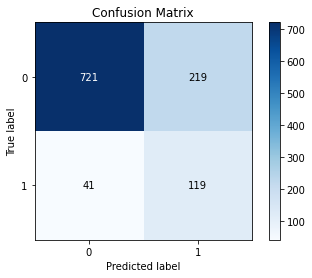

In [ ]:
#  Confusion Matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred) #, normalize=True)

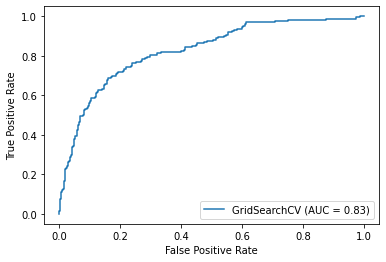

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(gridSearch, X_test, y_test)

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       940
           1       0.35      0.74      0.48       160

    accuracy                           0.76      1100
   macro avg       0.65      0.76      0.66      1100
weighted avg       0.86      0.76      0.79      1100



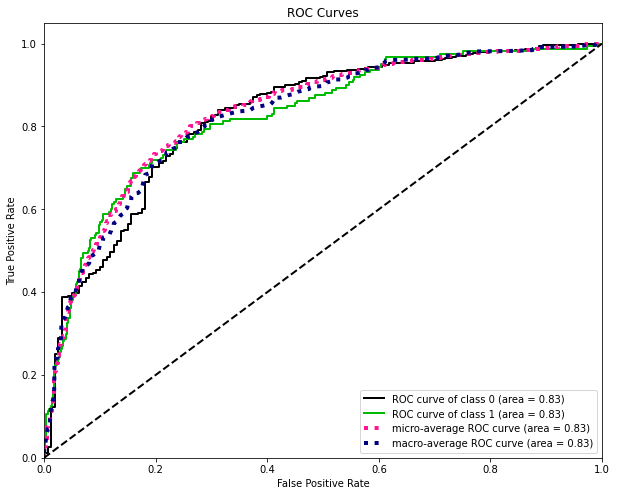

In [ ]:
y_probas = gridSearch.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(10, 8))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


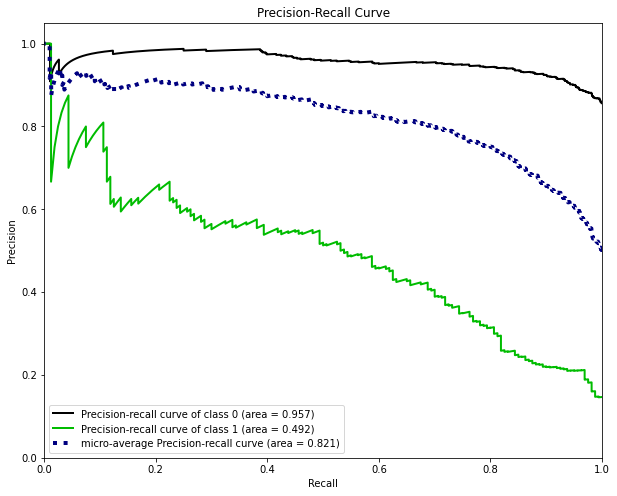

In [ ]:
skplt.metrics.plot_precision_recall_curve(y_test, y_probas, figsize=(10, 8))
#ConfusonMattrix   وهو ما يعكسه  الجدول أعلاه بخصوص عدد المنخرطين الذين انهوا عقودهم باللون الاخضر أدناه

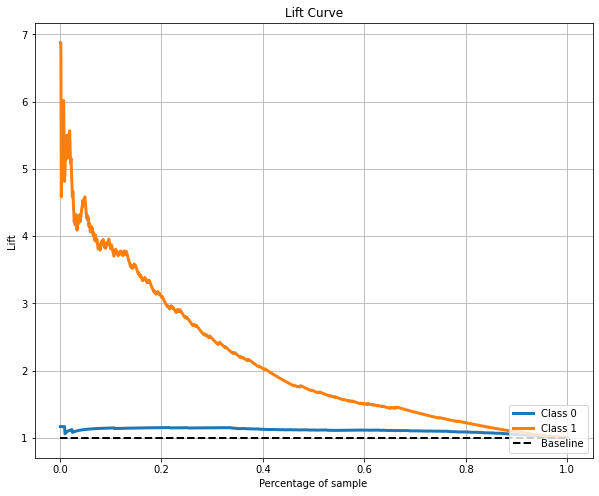

In [ ]:
# Lift is a measure of the effectiveness of a predictive model calculated as the ratio between the results obtained with and without the predictive model.
skplt.metrics.plot_lift_curve(y_test, y_probas, figsize=(10, 8))

### RandomizedSearchCV

In [ ]:
# %%timeit
from sklearn.model_selection import RandomizedSearchCV
RdSearch = RandomizedSearchCV(pipe_XGBCl, param_distributions=param_grid, cv=kf, verbose=3,
                                n_jobs=-1 ,scoring= 'accuracy'  , n_iter=1000 ) # refit="recall_score" )

In [ ]:
# التدريب
RdSearch.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 576 is smaller than n_iter=1000. Running 576 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1564 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 2336 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  8.0min finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('standardscaler',
                                                                                                StandardScaler())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7f366b49c0b8>),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps...
                                             ('xgbclassifier',
                                              XGBClassifier())]),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'pca__n_components': [40, 60, 80],
                                        'xgbclassifier__colsample_bytree': [0.1,
                                                                            0.2],
                                        'xgbclassifier__gamma': [0.0, 0.1, 0.2],
                                        'xgbclassifier__learning_rate': [0.01,
                                                                         0.1,
                                                                         0.2,
                                                                         0.3],
                                        'xgbclassifier__max_depth': range(3, 5),
                                        'xgbclassifier__n_estimators': [50, 100,
                                                                        150,
                                                                        200]},
                   scoring='accuracy', verbose=3)

In [ ]:
# افضل المعايير التي تم الاحتفاظ بها
RdSearch.best_params_

{'pca__n_components': 40,
 'xgbclassifier__colsample_bytree': 0.2,
 'xgbclassifier__gamma': 0.1,
 'xgbclassifier__learning_rate': 0.2,
 'xgbclassifier__max_depth': 3,
 'xgbclassifier__n_estimators': 150}

In [ ]:
#  قائمة أفضل المعاييير
RdSearch.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f366b4a6f98>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f366b4a6588>)])),
                ('pca', PCA(n_components=40)),
                ('xgbclassifier',
                 XGBClassifier(colsample_bytree=0.2, gamma=0.1,
                               learning_rate=0.2, n_estimators=150))])

In [ ]:
# قياس الدقة في ضوء أفضل المعايير
f" Score {RdSearch.best_estimator_.score(X_test, y_test):.3}"

' Score 0.875'

In [ ]:
y_pred=RdSearch.predict(X_test)
f'Accuracy: {accuracy_score(y_test, y_pred):.3}'

'Accuracy: 0.875'

In [ ]:
#AUC    قياس درجة  دقة  التنبؤ لمعيار
f'Best AUC Score: {RdSearch.best_score_ :.3}'


'Best AUC Score: 0.877'

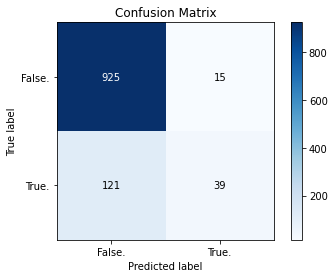

In [ ]:
#  Confusion Matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred) #, normalize=True)

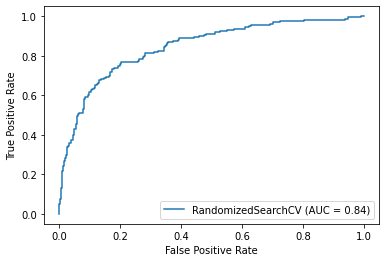

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(gridSearch, X_test, y_test)

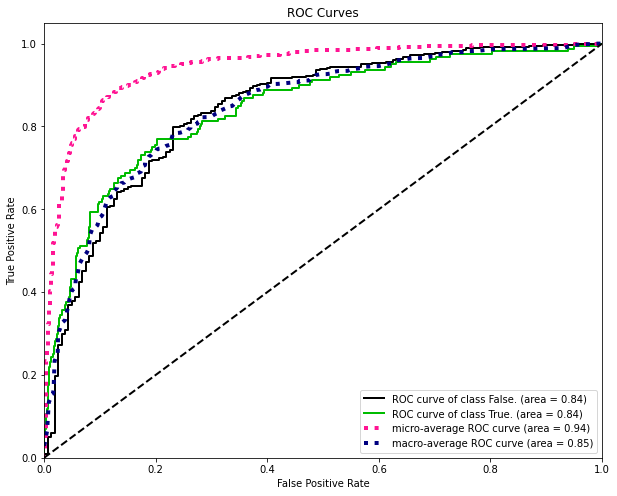

In [ ]:
#
y_probas = RdSearch.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(10, 8))

In [ ]:
y_probas = RdSearch.predict_proba(X_test)
y_probas[:3]

array([[0.9589995 , 0.04100047],
       [0.99620414, 0.00379584],
       [0.5277356 , 0.4722644 ]], dtype=float32)

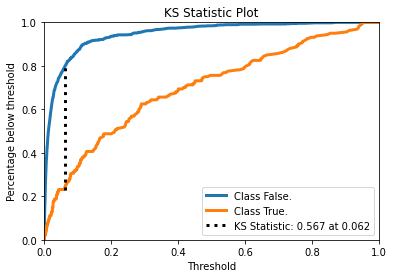

In [ ]:
# AUC تخطيط
# The K-S statistic plot, or the Kolmogorov Smirnov statistic plot, is a plot that tells you whether the model gets confused
#when it comes to predicting the different labels in your dataset

skplt.metrics.plot_ks_statistic(y_test, y_probas)

In [ ]:
print ('ROC AUC =', metrics.roc_auc_score(y_test, y_probas[:,1]))

ROC AUC = 0.8443683510638298


In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      False.       0.88      0.98      0.93       940
       True.       0.72      0.24      0.36       160

    accuracy                           0.88      1100
   macro avg       0.80      0.61      0.65      1100
weighted avg       0.86      0.88      0.85      1100



In [ ]:
# عرض جدول القيم التي تم التنبؤ بها ومقارنتها بتلك التي بالجدول الأصلي
pd.DataFrame({"Predicted":y_pred, "Actual Value": y_test}).sample(6, random_state=10)

Predicted Actual Value
3056    False.       False.
1044     True.       False.
1795    False.       False.
1586    False.       False.
2650    False.       False.
2124    False.       False.